In [1]:
# add h4d proj root to sys.path so we can import stuff that's in h4d_main/h4d:
# Example: suppose you want to import something from <h4d_main>/h4d/h4d/submodule/:
# "import h4d.submodule" or "from h4d.submodule import foo"
import sys, subprocess
sys.path.append(subprocess.check_output(['git','rev-parse','--show-toplevel']).strip().decode("utf-8") )

In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import os.path
import pylab
pylab.rcParams['figure.figsize'] = (8.0, 10.0)
from h4dlib.config import h4dconfig

from pathlib import Path

In [19]:
dataDir = h4dconfig.DATA_DIR / 'Xview/coco_vanilla'
dataType = ''
annFile = dataDir / "xview_coco_v2.json"
print("xviewcoco_dir: ", dataDir)
print("annFile: ", annFile)

xviewcoco_dir:  /home/gbiamby/school/h4dmain/h4d/h4dlib/../datasets/Xview/coco_vanilla
annFile:  /home/gbiamby/school/h4dmain/h4d/h4dlib/../datasets/Xview/coco_vanilla/xview_coco_v2.json


In [20]:
# initialize COCO api for instance annotations
coco=COCO(annFile)

loading annotations into memory...
Done (t=3.00s)
creating index...
index created!


In [21]:
# display COCO categories and supercategories
cats = coco.loadCats(coco.getCatIds())
categories = [cat['name'] for cat in cats]
print(F"COCO categories (count: {len(categories)}): \n{categories}\n")

parent_categories = set([cat['supercategory'] for cat in cats])
print(F"COCO supercategories (count: {len(parent_categories)}): \n{parent_categories}")

COCO categories (count: 35): 
['Other Aircraft', 'Small Plane', 'Passenger/Cargo Plane', 'Helicopter', 'Other Passenger Vehicle', 'Car', 'Bus', 'Other Truck', 'Truck w/Trailer Bed', 'Truck w/Liquid Tank', 'Crane Truck', 'Passenger Car', 'Other Railway Vehicle', 'Locomotive', 'Motor/Sail/Small Boat', 'Barge', 'Other Maritime Vessel', 'Container Ship', 'Tower Crane', 'Container Crane', 'Straddle Carrier', 'Dump/Haul Truck', 'Loader/Dozer/Tractor/Scraper', 'Excavator', 'Other Engineering Vehicle', 'Hut/Tent', 'Shed', 'Other Building', 'Aircraft Hangar', 'Damaged Building', 'Facility', 'Helipad', 'Storage Tank', 'Pylon', 'Tower Structure']

COCO supercategories (count: 8): 
{'Railway Vehicle', 'Maritime Vessel', 'Passenger Vehicle', 'None', 'Building', 'Aircraft', 'Truck', 'Engineering Vehicle'}


In [22]:
# get all images containing given categories, select one at random
cat_ids = coco.getCatIds(catNms=['Truck w/Trailer Bed','Car']);
print(F"Category id's: {cat_ids}")
img_ids = coco.getImgIds(catIds=cat_ids );
print(F"img_ids: {img_ids}")

# img_ids = coco.getImgIds(imgIds = [324158])
# img = coco.loadImgs(imgIds[np.random.randint(0,len(img_ids))])[0]

Category id's: [5, 8]
img_ids: [0, 1, 2, 3, 4, 5, 6, 7, 8, 14, 15, 16, 17, 18, 19, 21, 23, 25, 26, 27, 28, 29, 34, 36, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 57, 60, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 73, 74, 76, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 90, 92, 93, 96, 97, 101, 104, 105, 107, 109, 111, 112, 113, 118, 120, 126, 131, 134, 135, 136, 137, 138, 140, 141, 142, 143, 144, 145, 146, 147, 150, 151, 152, 153, 154, 155, 157, 159, 163, 164, 168, 178, 179, 183, 206, 207, 210, 213, 214, 215, 216, 217, 219, 220, 221, 223, 225, 228, 234, 235, 239, 253, 254, 281, 285, 286, 292, 293, 295, 296, 302, 303, 307, 308, 310, 311, 313, 314, 317, 318, 321, 333, 335, 336, 345, 353, 355, 359, 360, 361, 362, 363, 364, 365, 366, 368, 369, 371, 373, 374, 378, 379, 382, 383, 385, 386, 387, 388, 389, 391, 392, 393, 394, 395, 396, 397, 398, 399, 401, 402, 405, 406, 408, 409, 411, 412, 413, 414, 417, 418, 419, 420, 421, 423, 424, 426, 428, 429, 432, 433, 434, 439, 440, 441, 442, 443, 446, 448

In [23]:
# for img_id in img_ids[:5]:
img = coco.loadImgs(img_ids[np.random.randint(0,len(img_ids))])[0]

Displaying image: {'license': 1, 'file_name': 'COCO_2014_000000000482.jpeg', 'coco_url': '', 'width': 4985, 'height': 3180, 'date_captured': '2018-02-22 00:00:00', 'flickr_url': '', 'id': 482}
Img path:  /home/gbiamby/school/h4dmain/h4d/h4dlib/../datasets/Xview/coco_vanilla/COCO_2014_000000000482.jpeg


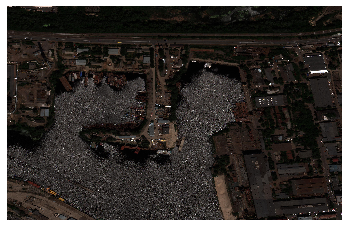

In [24]:
# load and display image
# I = io.imread('%s/images/%s/%s'%(dataDir,dataType,img['file_name']))
# use url to load image
print(F"Displaying image: {img}")
print("Img path: " , os.path.join(dataDir, dataType, img['file_name']))
I = io.imread(os.path.join(dataDir, dataType, img['file_name']))
plt.axis('off')
plt.imshow(I)
plt.show()

Ann count:  282


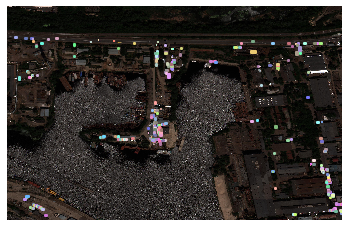

In [25]:
# load and display instance annotations (only for the specified cat_ids)
plt.imshow(I); plt.axis('off')
annIds = coco.getAnnIds(imgIds=img['id'], catIds=cat_ids, iscrowd=None)
anns = coco.loadAnns(annIds)
print("Ann count: ", len(anns))
coco.showAnns(anns)

Ann count:  589


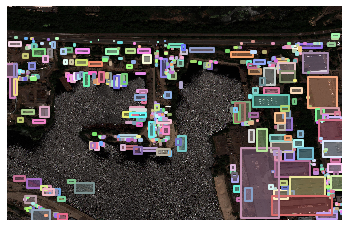

In [26]:
# load and display instance annotations (for *all* cat_ids)
plt.imshow(I); plt.axis('off')
annIds = coco.getAnnIds(imgIds=img['id'], iscrowd=None)
anns = coco.loadAnns(annIds)
print("Ann count: ", len(anns))
coco.showAnns(anns)